## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [379]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)


import seaborn as sns


import sys
sys.path.append('utils')
import math
plt.style.use('seaborn')

from sklearn.preprocessing import OrdinalEncoder

theme_colors = ["#ff8533", "#808080"]
font = 13


In [380]:
df = pd.read_csv(r"C:\Users\zarah\Desktop\Lighthouse Labs\Week8\ML-deployment-Project\data\data.csv") 

In [381]:
abc = df.copy()
abc

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [382]:
#Checking df(abc) for any missing values
abc.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [383]:
#Replacing isnan index with mode and median values
abc['Gender'] = abc['Gender'].fillna(abc['Gender'].dropna().mode().values[0] )
abc['Married'] = abc['Married'].fillna(abc['Married'].dropna().mode().values[0] )
abc['Dependents'] = abc['Dependents'].fillna( abc['Dependents'].dropna().mode().values[0] )
abc['Self_Employed'] = abc['Self_Employed'].fillna(abc['Self_Employed'].dropna().mode().values[0] )
abc['LoanAmount'] = abc['LoanAmount'].fillna(abc['LoanAmount'].dropna().median() )
abc['Loan_Amount_Term'] = abc['Loan_Amount_Term'].fillna(abc['Loan_Amount_Term'].dropna().mode().values[0] )
abc['Credit_History'] = abc['Credit_History'].fillna(abc['Credit_History'].dropna().mode().values[0] )

In [384]:
#Checking df(abc) for any missing values
abc.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

### Comment
Applying the log function will remove the skewness of data and will make it normal. As total income is skewed i have applied log of that which makes it normal so that many machine learning algorithms can be applied smoothly.

c:\Users\zarah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

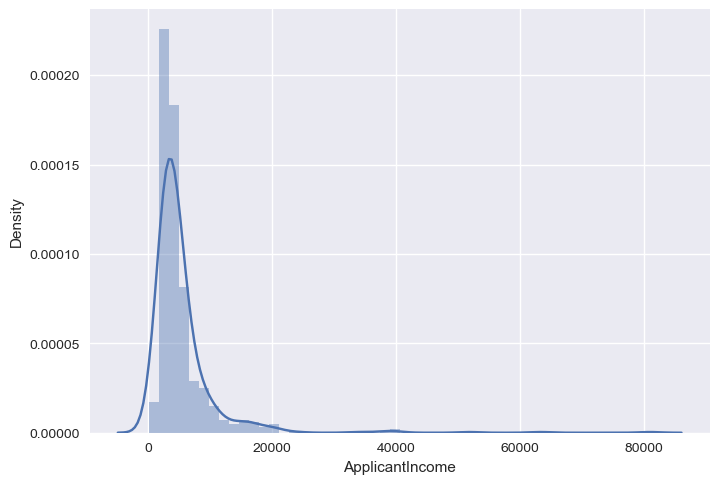

In [385]:
sns.distplot(abc['ApplicantIncome'])

c:\Users\zarah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome_Log', ylabel='Density'>

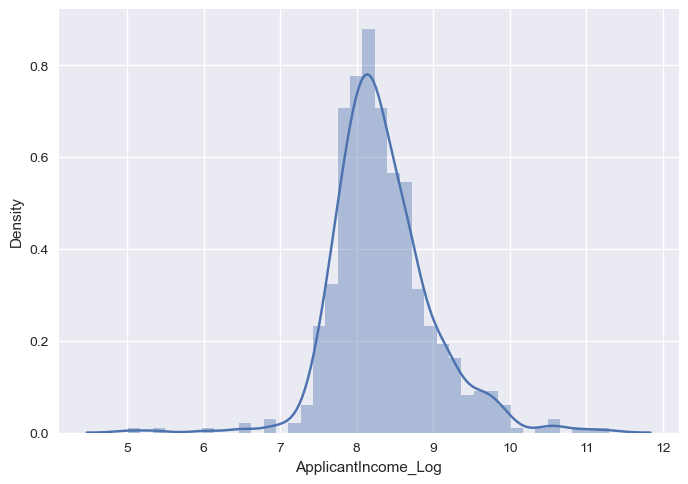

In [386]:
abc['ApplicantIncome_Log']=np.log(abc['ApplicantIncome'])
sns.distplot(abc['ApplicantIncome_Log'])

c:\Users\zarah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

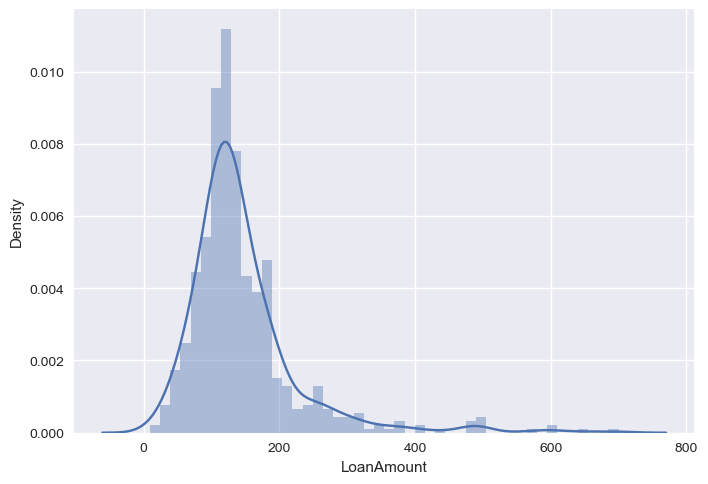

In [387]:
sns.distplot(abc['LoanAmount'])

c:\Users\zarah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount_Log', ylabel='Density'>

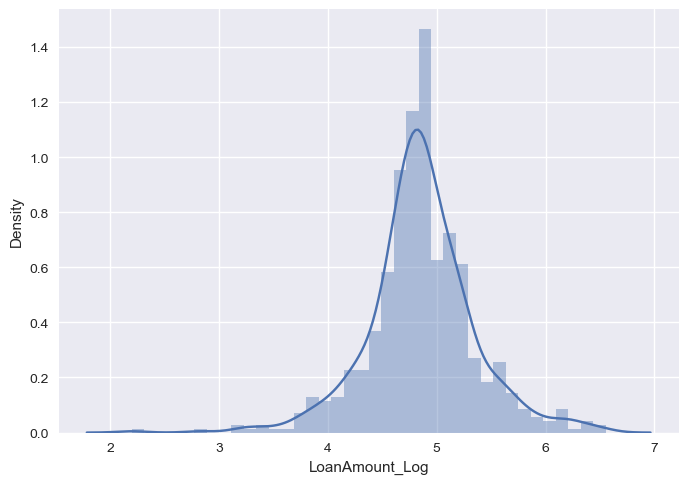

In [388]:
abc['LoanAmount_Log']=np.log(abc['LoanAmount'])
sns.distplot(abc['LoanAmount_Log'])

Combine both incomes as total income and take a log transformation of the same.

c:\Users\zarah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

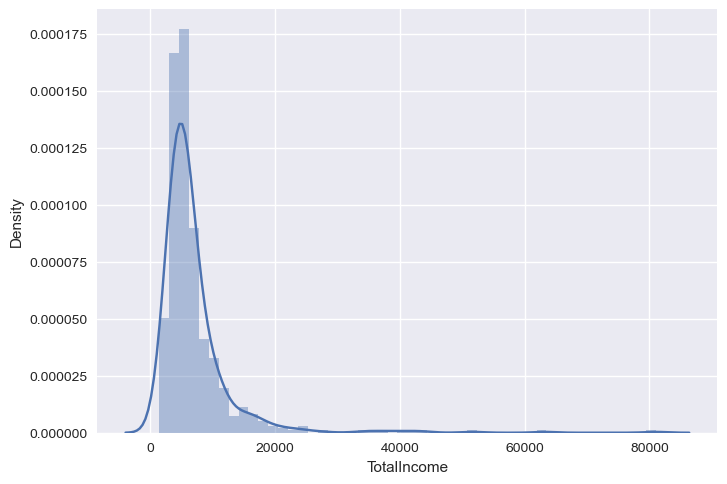

In [389]:
abc['TotalIncome']=abc['ApplicantIncome']+abc['CoapplicantIncome']
sns.distplot(abc['TotalIncome'])

c:\Users\zarah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalIncome_Log', ylabel='Density'>

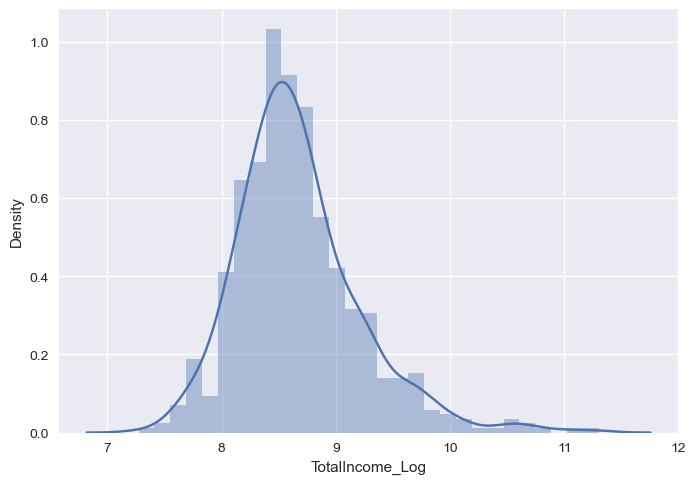

In [390]:
abc['TotalIncome_Log']=np.log(abc['TotalIncome'])
sns.distplot(abc['TotalIncome_Log'])

In [391]:
abc["Dependents"] = abc["Dependents"].replace({"3+" : 3})

In [392]:
abc.dtypes

Loan_ID                 object
Gender                  object
Married                 object
Dependents              object
Education               object
Self_Employed           object
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area           object
Loan_Status             object
ApplicantIncome_Log    float64
LoanAmount_Log         float64
TotalIncome            float64
TotalIncome_Log        float64
dtype: object

In [393]:
categorical_cols = ["Married", "Gender", "Self_Employed", "Education","Loan_Status", "Property_Area"]

continous_cols = ["LoanAmount", "Loan_Amount_Term", "ApplicantIncome", "CoapplicantIncome", "Credit_History"]

for col in categorical_cols:
    abc[col] = abc[col].astype("category")
    
for col in continous_cols:
    abc[col] = abc[col].astype("int16")
     

In [394]:
abc.dtypes

Loan_ID                  object
Gender                 category
Married                category
Dependents               object
Education              category
Self_Employed          category
ApplicantIncome           int16
CoapplicantIncome         int16
LoanAmount                int16
Loan_Amount_Term          int16
Credit_History            int16
Property_Area          category
Loan_Status            category
ApplicantIncome_Log     float64
LoanAmount_Log          float64
TotalIncome             float64
TotalIncome_Log         float64
dtype: object

In [395]:
# We will drop id column becuase it's useless
abc = abc.drop("Loan_ID", axis= 1)

    One hot encoding for categoricals



In [396]:
for col in categorical_cols:
    print(f"Unique values of {col} column is : {list(abc[col].unique())}")

Unique values of Married column is : ['No', 'Yes']
Unique values of Gender column is : ['Male', 'Female']
Unique values of Self_Employed column is : ['No', 'Yes']
Unique values of Education column is : ['Graduate', 'Not Graduate']
Unique values of Loan_Status column is : ['Y', 'N']
Unique values of Property_Area column is : ['Urban', 'Rural', 'Semiurban']


In [397]:
def one_hot_encode(data, cols, postfix= "_new") -> pd.DataFrame:
    
    """
    This simple function takes a data frame and
    one hot uncode it's columns.
    
    :returns:the data frame but with one hot encode it
    and replaced it's old categorical cols with new cols
    
    :params:takes the data frame and a list of the categorical 
    column names and takes a post fix to add after the new column
    defualt is : "_new"
    """
    
    global new_cols
    new_cols = [col + "_new" for col in cols]
    
    for new_col, col in zip(new_cols, cols):
        data[new_col] = data[col].cat.codes
        
    data = data.drop(cols, axis= 1)
    return data

abc = one_hot_encode(abc, categorical_cols)

In [398]:

for col in new_cols:
    print(f"Unique values for {col} column after "+ \
          f"one hot encoding is: {list(abc[col].unique())}")

Unique values for Married_new column after one hot encoding is: [0, 1]
Unique values for Gender_new column after one hot encoding is: [1, 0]
Unique values for Self_Employed_new column after one hot encoding is: [0, 1]
Unique values for Education_new column after one hot encoding is: [0, 1]
Unique values for Loan_Status_new column after one hot encoding is: [1, 0]
Unique values for Property_Area_new column after one hot encoding is: [2, 0, 1]


    Outlier detection with Z-score algorithm



In [399]:
df2=abc.copy()
df2.reset_index(drop=True)

df2

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_Log,LoanAmount_Log,TotalIncome,TotalIncome_Log,Married_new,Gender_new,Self_Employed_new,Education_new,Loan_Status_new,Property_Area_new
0,0,5849,0,128,360,1,8.674026,4.852030,5849.0,8.674026,0,1,0,0,1,2
1,1,4583,1508,128,360,1,8.430109,4.852030,6091.0,8.714568,1,1,0,0,0,0
2,0,3000,0,66,360,1,8.006368,4.189655,3000.0,8.006368,1,1,1,0,1,2
3,0,2583,2358,120,360,1,7.856707,4.787492,4941.0,8.505323,1,1,0,1,1,2
4,0,6000,0,141,360,1,8.699515,4.948760,6000.0,8.699515,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0,71,360,1,7.972466,4.262680,2900.0,7.972466,0,0,0,0,1,0
610,3,4106,0,40,180,1,8.320205,3.688879,4106.0,8.320205,1,1,0,0,1,0
611,1,8072,240,253,360,1,8.996157,5.533389,8312.0,9.025456,1,1,0,0,1,2
612,2,7583,0,187,360,1,8.933664,5.231109,7583.0,8.933664,1,1,0,0,1,2


In [400]:
df2.to_csv('cleaneddata.csv',index=False)


Text(0.5, 1.0, 'Box plot of original Dataset')

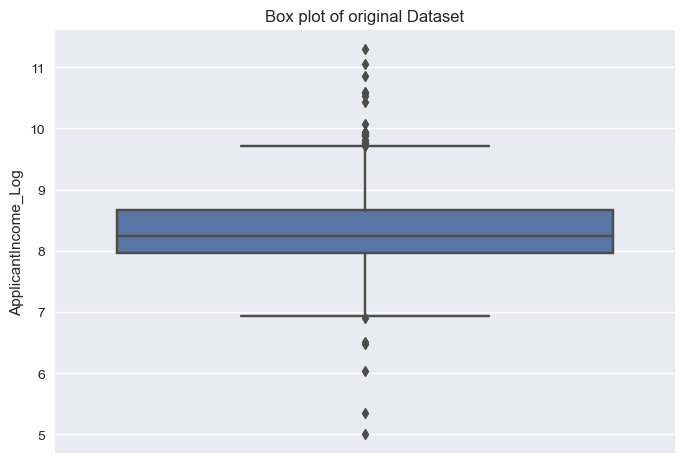

In [401]:
sns.boxplot(y=df2['ApplicantIncome_Log'])
plt.title("Box plot of original Dataset")

Text(0.5, 1.0, 'Box plot of original Dataset')

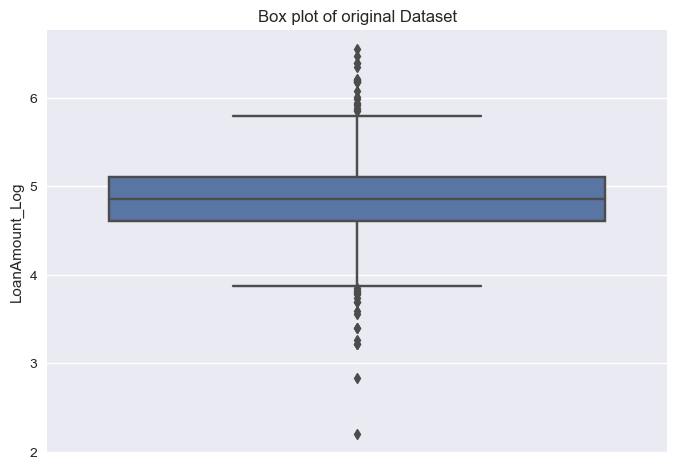

In [402]:
sns.boxplot(y=df2['LoanAmount_Log'])
plt.title("Box plot of original Dataset")

Text(0.5, 1.0, 'Box plot of original Dataset')

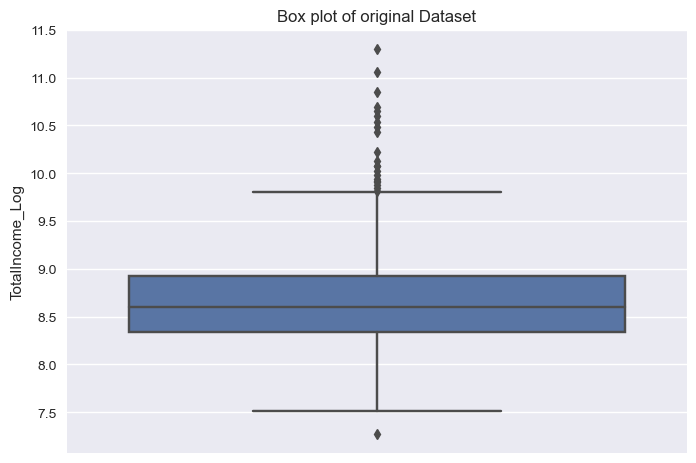

In [403]:
sns.boxplot(y=df2['TotalIncome_Log'])
plt.title("Box plot of original Dataset")

def outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 - 1.5 * IQR

    lower_outliers = col[col < lower_bound].index.tolist() 
    upper_outliers = col[col > upper_bound].index.tolist()

    bad_indices = list(set(upper_outliers + lower_outliers))
    return(bad_indices)


import numpy as np
bad_indexes = []
for col in df2.columns:
    if df2[col].dtype in ["int16","float64"]:
        bad_indexes.append(outliers(df2[col]))

bad_indexes = set(list(np.concatenate(bad_indexes).flat))
print(len(bad_indexes))


# Trim outliers by removing rows where the value in the 'Diameter (micrometer)' column is less than the lower bound or greater than the upper bound
df2_trimmed = abc[(abc['ApplicantIncome_Log'] >= lower_bound) & (abc['ApplicantIncome_Log'] <= upper_bound)]
# Print the original and trimmed dataset sizes
print('Original dataset size:', abc.shape)
print('Trimmed dataset size:', abc_trimmed.shape)
sns.boxplot(y=abc_trimmed['ApplicantIncome_Log'])
plt.title("Box plot  from trimmed Dataset")

In this section we finished the feature engineering & cleaning step
we will feature select & augment the data in the first sections of EDA

### EDA

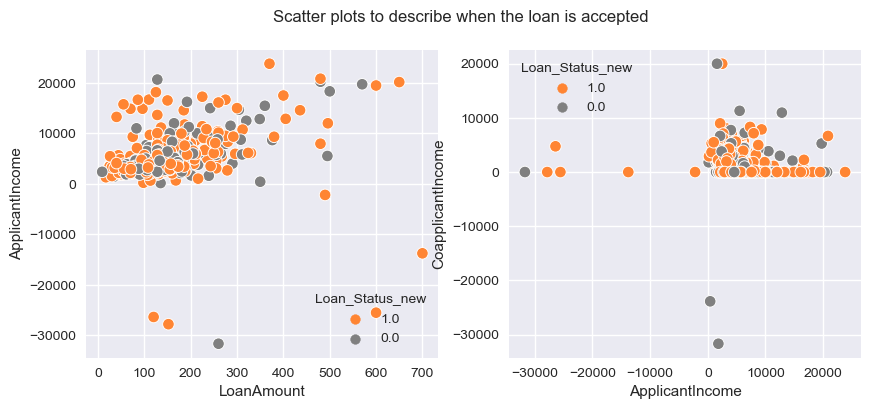

In [404]:
fig, axes = plt.subplots(nrows= 1, ncols= 2)
colors = {1.0: theme_colors[0], 0.0: theme_colors[1]}

sns.scatterplot(x= "ApplicantIncome", y= "CoapplicantIncome",
                hue= "Loan_Status_new", data= abc, ax = axes[1],
                hue_order= [1.0, 0.0], palette=colors, s=70)

sns.scatterplot(x= "LoanAmount", y= "ApplicantIncome",
                hue= "Loan_Status_new", data= abc,
                ax = axes[0], palette=colors,
                hue_order= [1.0, 0.0], s= 70)

fig.set_size_inches(10, 4)
fig.suptitle("Scatter plots to describe when the loan is accepted")
plt.show()

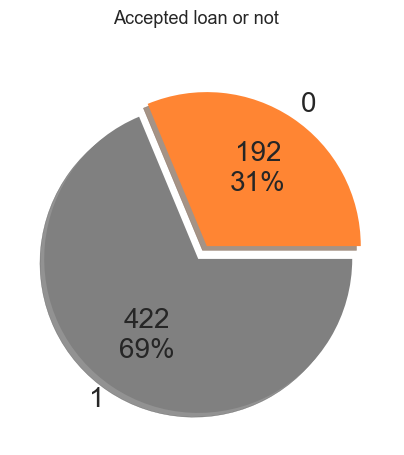

In [405]:
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))

spaces = (0.05, 0.05)
label_function = lambda val:  f'{val / 100 * len(abc):.0f}\n{val:.0f}%'


abc.groupby("Loan_Status_new").size().plot(kind= "pie", autopct=label_function,
                                           textprops={'fontsize': 20},
                                           ax=ax, colors= theme_colors, ylabel= "",
                                           shadow= True, explode= spaces)
fig.suptitle("Accepted loan or not", fontsize= font)
plt.show()

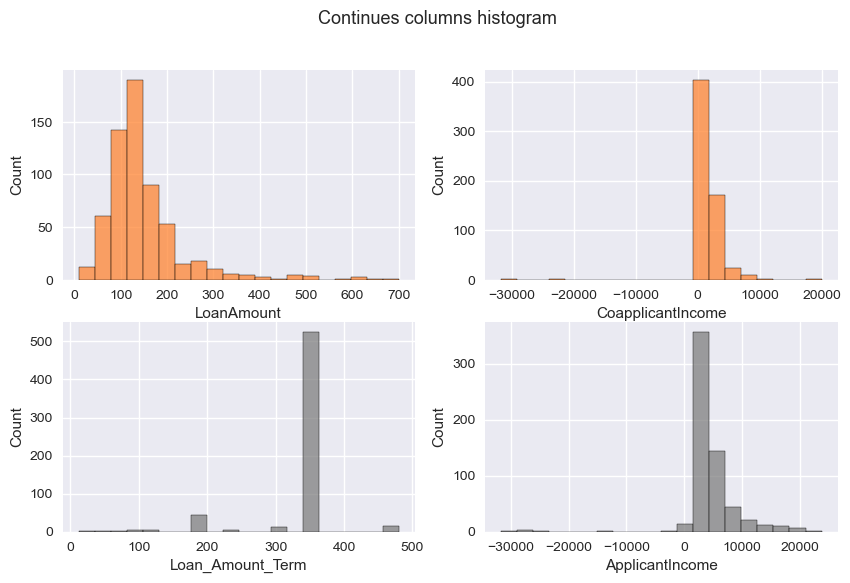

In [406]:
fig, axes = plt.subplots(nrows= 2, ncols= 2)

sns.histplot(data=abc, x="CoapplicantIncome", ax= axes[0,1], bins= 20, color= theme_colors[0])
sns.histplot(data=abc, x="ApplicantIncome", ax= axes[1,1], bins= 20, color= theme_colors[1])
sns.histplot(data=abc, x="LoanAmount", ax= axes[0,0], bins= 20, color= theme_colors[0])
sns.histplot(data=abc, x="Loan_Amount_Term", ax= axes[1,0], bins= 20, color= theme_colors[1])

fig.set_size_inches(10, 6)
fig.suptitle("Continues columns histogram", fontsize= font)
plt.show()

From this histogrm we can find that Loan_Amount_Term is about 360 mustmost of time so we will drop it to enchance the performance of the ML models.

In [407]:
abc = abc.drop("Loan_Amount_Term", axis= 1)


In [408]:
abc.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History', 'ApplicantIncome_Log', 'LoanAmount_Log',
       'TotalIncome', 'TotalIncome_Log', 'Married_new', 'Gender_new',
       'Self_Employed_new', 'Education_new', 'Loan_Status_new',
       'Property_Area_new'],
      dtype='object')

### Analysis conclusions
The bank doesn't accept the loan request more likly if co-applicant income = 2000
There is positive correlation between the requsted loan amount and applicant income
The bank doesn't accept more likly if loan amount between 100K and 200K and applicant income = 2500
The bank more likly to accept the loan request if you are married.
You are more likly to get the loan if you are semi urban.
There is a negative relationship between count of dependents and the chance of your loan be accepted
The general ratio of getting a loan is 69%
The loan request is more likely to be accepted if you are graduated

## 4. Building a Predictive Model

In [409]:
# Importing the libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest



In [410]:
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

In [411]:
abc.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History', 'ApplicantIncome_Log', 'LoanAmount_Log',
       'TotalIncome', 'TotalIncome_Log', 'Married_new', 'Gender_new',
       'Self_Employed_new', 'Education_new', 'Loan_Status_new',
       'Property_Area_new'],
      dtype='object')

In [412]:
xyz.columns

NameError: name 'xyz' is not defined

In [ ]:
xyz = abc.drop(['Gender', 'Married', 'LoanAmount', 'TotalIncome', 'Self_Employed', 'Education', 'Loan_Status', 'Property_Area', 'ApplicantIncome'], axis=1)


In [ ]:
# Separating the dataframe between the X (independent) and y (dependent) variables
X = df3.drop('Loan_Status_new', axis=1).select_dtypes(include=[np.number])
y = df3['Loan_Status_new']

In [ ]:
# Splitting the set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=100)

In [ ]:
# Printing the X_train 
print(abc.shape)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)


In [ ]:
# loss

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [ ]:
#train_eval_train

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, X_train, y_train)

# we can see that best model is LogisticRegression at least for now, SVC is just memorizing the data so it is overfitting .

In [ ]:
# train_eval_cross
# in the next cell i will be explaining this function

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    # we will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)
        
train_eval_cross(models, X_train, y_train, skf)

# ohhh, as i said SVC is just memorizing the data, and you can see that here DecisionTreeClassifier is better than LogisticRegression 

In [ ]:
# some explanation of the above function

x = []
idx = [' pre', ' rec', ' f1', ' loss', ' acc']

# we will use one model
log = LogisticRegression()

for train, test in skf.split(X_train, y_train):
    log.fit(X_train.iloc[train], y_train.iloc[train])
    ls = loss(y_train.iloc[test], log.predict(X_train.iloc[test]), retu=True)
    x.append(ls)
    
# thats what we get
pd.DataFrame(x, columns=idx)

# (column 0 represent the precision_score of the 10 folds)
# (row 0 represent the (pre, rec, f1, loss, acc) for the first fold)
# then we should find the mean of every column
# pd.DataFrame(x, columns=idx).mean(axis=0)

In [ ]:
# ooh, we got it right for most of the features, as you can see we've say at the first of the kernel ,
# that Credit_Histroy and Married etc, are good features, actually Credit_Histroy is the best .

data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

# here we got 58% similarity between LoanAmount & ApplicantIncome 
# and that may be bad for our model so we will see what we can do

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python